about data


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn


%matplotlib inline

In [34]:
data=pd.read_csv(r"C:\Users\USER\Desktop\music.csv")

In [35]:
data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [36]:
data.shape

(18, 3)

In [37]:
data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [38]:
data.columns

Index(['age', 'gender', 'genre'], dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 564.0+ bytes


In [40]:
data.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

In [41]:
data=data.drop_duplicates()

In [42]:
data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


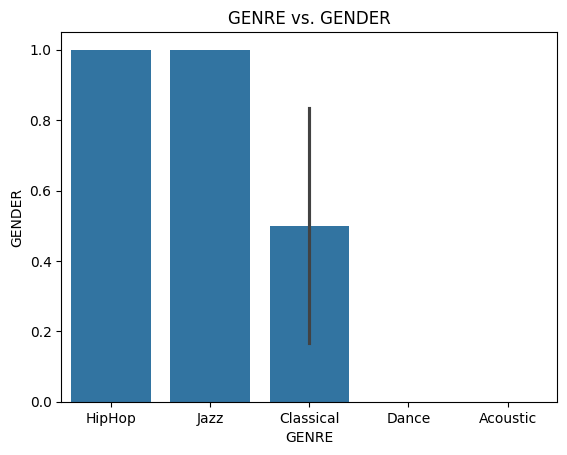

In [43]:
sns.barplot(x='genre', y='gender', data=data)
plt.xlabel('GENRE')
plt.ylabel('GENDER')
plt.title('GENRE vs. GENDER')
plt.show()

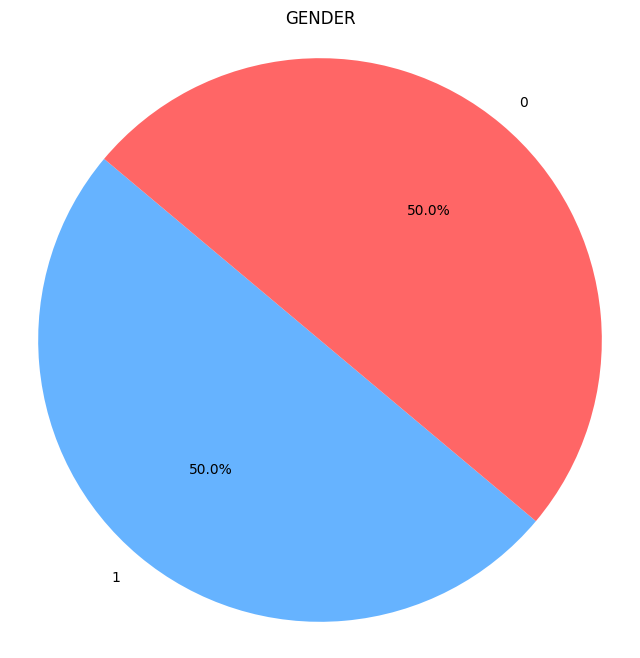

In [44]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title('GENDER')
plt.axis('equal') 
plt.show()

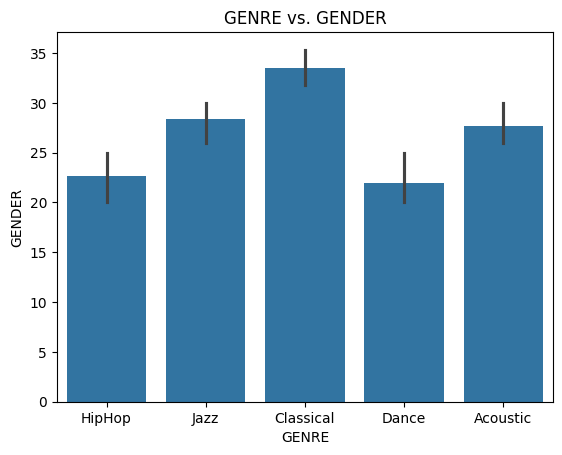

In [45]:
sns.barplot(x='genre', y='age', data=data)
plt.xlabel('GENRE')
plt.ylabel('GENDER')
plt.title('GENRE vs. GENDER')
plt.show()

In [46]:
data.genre.unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

In [47]:
data['genre']=data.genre.map({'HipHop':1,'Jazz':2,'Classical':3,'Dance':4,'Acoustic':5})

In [48]:
data

,age,gender,genre
0,20,1,1
1,23,1,1
2,25,1,1
3,26,1,2
4,29,1,2
5,30,1,2
6,31,1,3
7,33,1,3
8,37,1,3
9,20,0,4


In [49]:
x=data.drop(['genre'],axis=1)

In [50]:
x.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


In [51]:
y=data[['genre']]

In [52]:
y.head()

,genre
0,1
1,1
2,1
3,2
4,2


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape

(14, 2)

In [55]:
x_test.shape

(4, 2)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier()
from sklearn.metrics import r2_score

In [57]:
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dr.predict(x_test)

In [59]:
score=r2_score(y_test,y_pred)
score

1.0

In [60]:
from sklearn.model_selection import cross_val_score
v = cross_val_score(dr, x_train, y_train, cv=3)
for i in range(3):
    print("accuracy: {:.2%}".format(v[i]))


accuracy: 60.00%
accuracy: 40.00%
accuracy: 100.00%


In [61]:
print("accuracy",v.mean())

accuracy 0.6666666666666666


In [62]:
import joblib

joblib.dump(dr, r'model\tree.pkl')

model = joblib.load(r'model\tree.pkl')


In [63]:
result=model.predict([[5,1]])

In [64]:
result

array([1], dtype=int64)